In [59]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [60]:
apartamente = np.array([
   (30, 40_000), (45, 65_000), (55, 130_000),  (60, 145_000), (75, 180_000), (75, 185_000), (80, 200_000), (100, 300_000), # (80, 40_000)
])
suprafete = apartamente[ : , 0 ]
preturi = apartamente[ : , 1 ]

In [61]:
suprafete

array([ 30,  45,  55,  60,  75,  75,  80, 100])

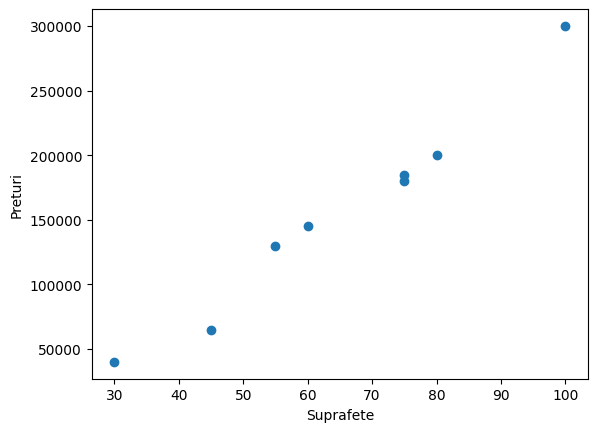

In [62]:
plt.scatter(suprafete, preturi);
plt.xlabel("Suprafete");
plt.ylabel("Preturi");

In [92]:
# x - suprafete, y - preturi, a - coef/slope, b - intercept (termentul liber)
def linear_plot(x, y, a, b):
    plt.scatter(x, y);
    plt.plot(x, a * x + b);
    # plt.show();
   


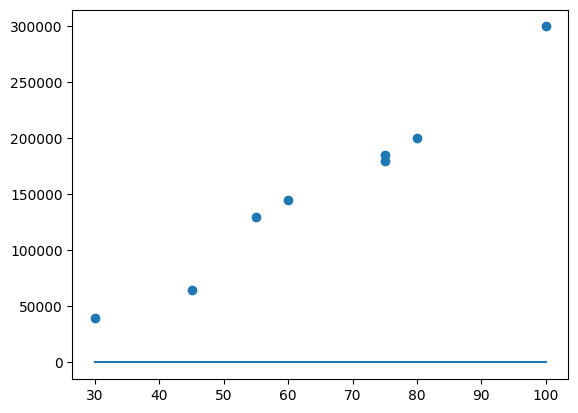

In [64]:
a = 0
b = 0
linear_plot(suprafete, preturi, a, b) 

In [65]:
preturi

array([ 40000,  65000, 130000, 145000, 180000, 185000, 200000, 300000])

In [66]:
preturi_calculate = a * preturi + b
preturi_calculate

array([0, 0, 0, 0, 0, 0, 0, 0])

In [67]:
(preturi[0] - preturi_calculate[0]) ** 2 + (preturi[1] - preturi_calculate[1]) ** 2 + (preturi[2] - preturi_calculate[2]) ** 2

np.int64(22725000000)

In [68]:
suma_reziduala = 1 / (2 * preturi.size) *  np.sqrt(((preturi - preturi_calculate) ** 2).sum())
suma_reziduala

np.float64(30642.533246290197)

In [69]:
# a = 0 
# b = 0
# noul_a si noul_b

In [70]:
derivata_a = 2 * np.sum(((preturi - preturi_calculate)) * suprafete)
derivata_b = 2 * np.sum(((preturi - preturi_calculate))) 

"derivata_a:", derivata_a, "derivata_b", derivata_b

('derivata_a:', np.int64(186700000), 'derivata_b', np.int64(2490000))

In [71]:
LEARNING_RATE = 0.001

In [72]:
noul_a = a - derivata_a * LEARNING_RATE
noul_b = b - derivata_b * LEARNING_RATE
noul_a, noul_b

(np.float64(-186700.0), np.float64(-2490.0))

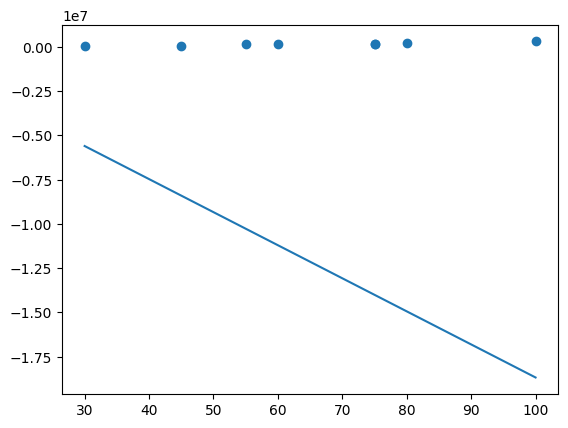

In [73]:
linear_plot(suprafete, preturi, noul_a, noul_b) 

# Calcul gradient in mai multi pasi

In [95]:
a = 1000
b = 0

cost = []

def calculeaza_graient ():
    global a, b
    LEARNING_RATE = 0.001
    
    preturi_calculate = a * preturi + b
    suma_reziduala = (1 / (2 * preturi.size)) *  np.sqrt(((preturi - preturi_calculate) ** 2).sum())
    cost.append(suma_reziduala)
    print("Noua suma reziduala este:", suma_reziduala, "noul_a", a, "noul_b", b)

    derivata_a = (1 / preturi.size) * np.sum((preturi_calculate - preturi) * suprafete)
    derivata_b = (1 / preturi.size) * np.sum(((preturi_calculate - preturi ))) 


    a = a - derivata_a * LEARNING_RATE
    b = b - derivata_b * LEARNING_RATE
    linear_plot(suprafete, preturi, a, b)
    

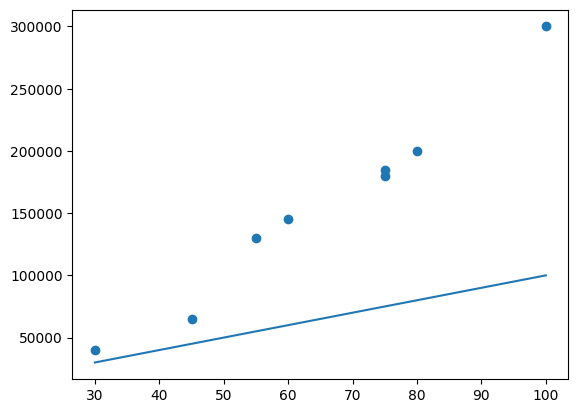

In [89]:
linear_plot(suprafete, preturi, a, b)

Noua suma reziduala este: 30611890.713043906 noul_a 1000 noul_b 0
Noua suma reziduala este: 357171912541.6871 noul_a -11656081.25 noul_b -155469.375
Noua suma reziduala este: 4167392892192027.0 noul_a 136000263778.94688 noul_b 1813822486.2506251
Noua suma reziduala este: 4.862410203058132e+19 noul_a -1586817195593600.2 noul_b -21163229041779.223
Noua suma reziduala este: 5.6733390861948995e+23 noul_a 1.851458770949713e+19 noul_b 2.4692728399844147e+17
Noua suma reziduala este: 6.619510704116126e+27 noul_a -2.160235967977586e+23 noul_b -2.881086031933777e+21
Noua suma reziduala este: 7.723480175639667e+31 noul_a 2.52050950880764e+27 noul_b 3.361579404670529e+25
Noua suma reziduala este: 9.011564251479525e+35 noul_a -2.940867700641696e+31 noul_b -3.922207101299363e+29
Noua suma reziduala este: 1.0514468660731424e+40 noul_a 3.4313311663596755e+35 noul_b 4.576333530634219e+33
Noua suma reziduala este: 1.2268020083122913e+44 noul_a -4.0035917190909903e+39 noul_b -5.339551951927535e+37
Noua 

/var/folders/3k/f_77v9pn1r94_xmvm2w3xgqr0000gn/T/ipykernel_9350/1498520343.py:11: RuntimeWarning: overflow encountered in square
  suma_reziduala = (1 / (2 * preturi.size)) *  np.sqrt(((preturi - preturi_calculate) ** 2).sum())
/var/folders/3k/f_77v9pn1r94_xmvm2w3xgqr0000gn/T/ipykernel_9350/1498520343.py:10: RuntimeWarning: overflow encountered in multiply
  preturi_calculate = a * preturi + b
/var/folders/3k/f_77v9pn1r94_xmvm2w3xgqr0000gn/T/ipykernel_9350/1498520343.py:19: RuntimeWarning: invalid value encountered in scalar subtract
  a = a - derivata_a * LEARNING_RATE
/var/folders/3k/f_77v9pn1r94_xmvm2w3xgqr0000gn/T/ipykernel_9350/1498520343.py:20: RuntimeWarning: invalid value encountered in scalar subtract
  b = b - derivata_b * LEARNING_RATE


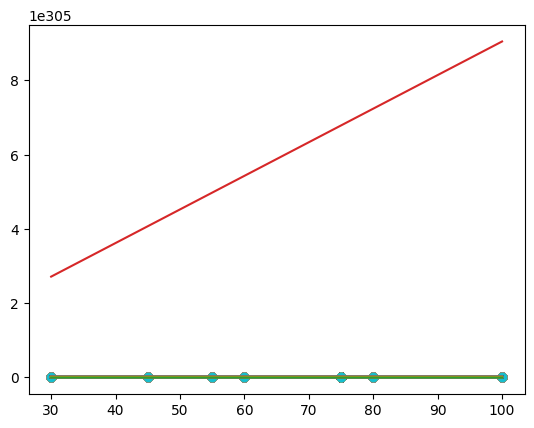

In [96]:
import time

EPOCI = 100
for i in range(EPOCI):
    calculeaza_graient ()
    # time.sleep(1)

In [97]:
cost

[np.float64(30611890.713043906),
 np.float64(357171912541.6871),
 np.float64(4167392892192027.0),
 np.float64(4.862410203058132e+19),
 np.float64(5.6733390861948995e+23),
 np.float64(6.619510704116126e+27),
 np.float64(7.723480175639667e+31),
 np.float64(9.011564251479525e+35),
 np.float64(1.0514468660731424e+40),
 np.float64(1.2268020083122913e+44),
 np.float64(1.4314020195998901e+48),
 np.float64(1.6701242155067277e+52),
 np.float64(1.9486593263307265e+56),
 np.float64(2.273647154408573e+60),
 np.float64(2.6528348556872565e+64),
 np.float64(3.0952616187184284e+68),
 np.float64(3.611474143508046e+72),
 np.float64(4.2137780568698527e+76),
 np.float64(4.916531257596226e+80),
 np.float64(5.736486184295331e+84),
 np.float64(6.69318916497647e+88),
 np.float64(7.809446368197171e+92),
 np.float64(9.111867463253207e+96),
 np.float64(1.0631499949343938e+101),
 np.float64(1.24045692750392e+105),
 np.float64(1.447334239123446e+109),
 np.float64(1.6887135323224866e+113),
 np.float64(1.97034887806

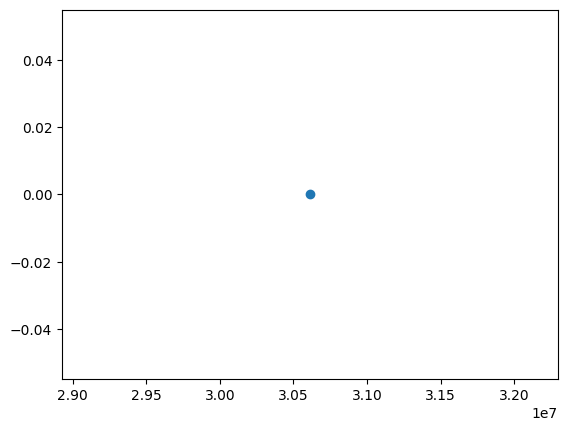

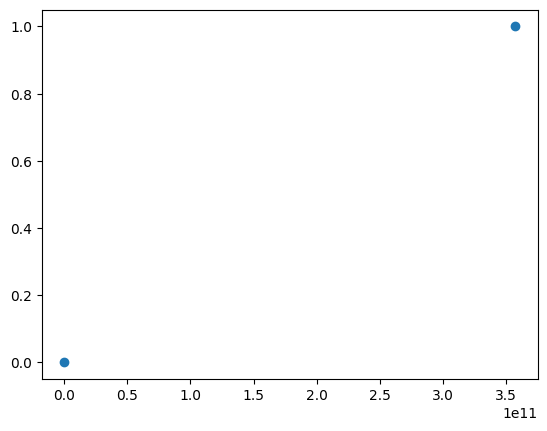

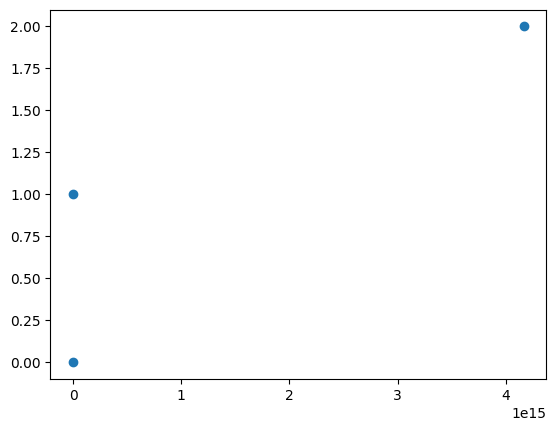

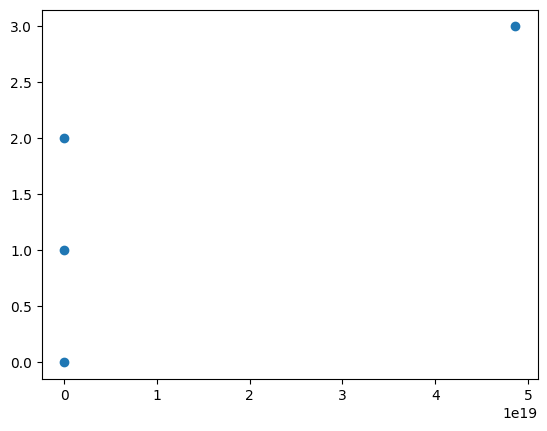

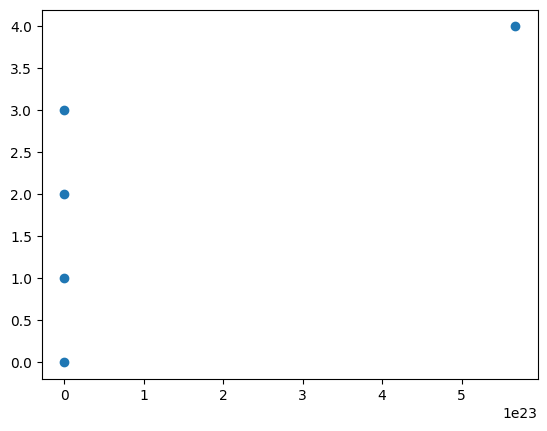

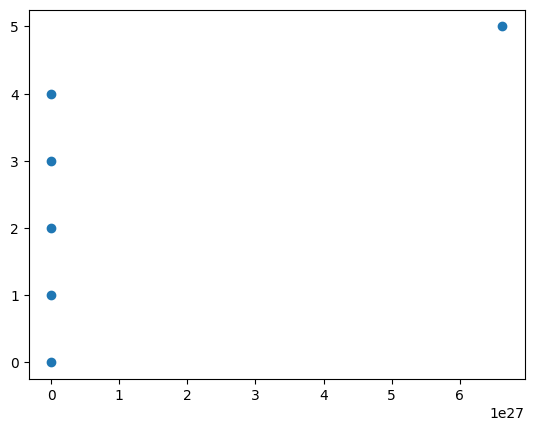

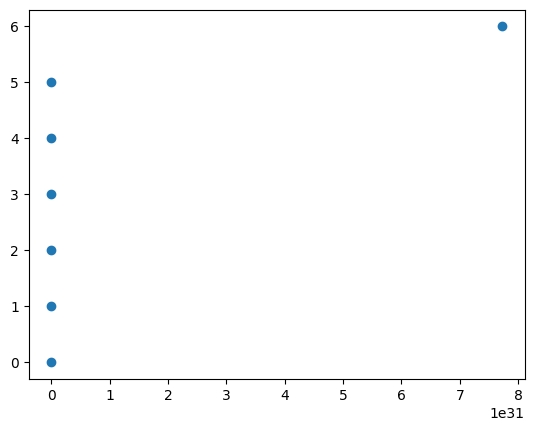

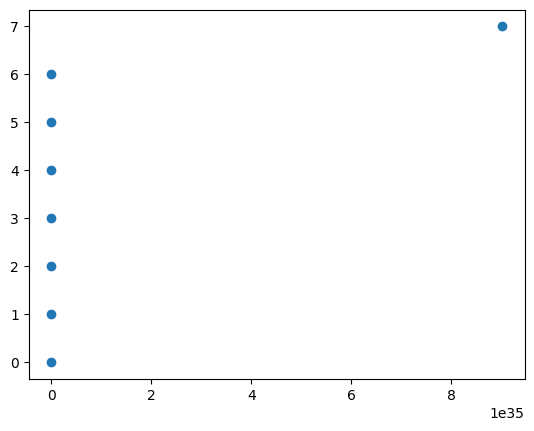

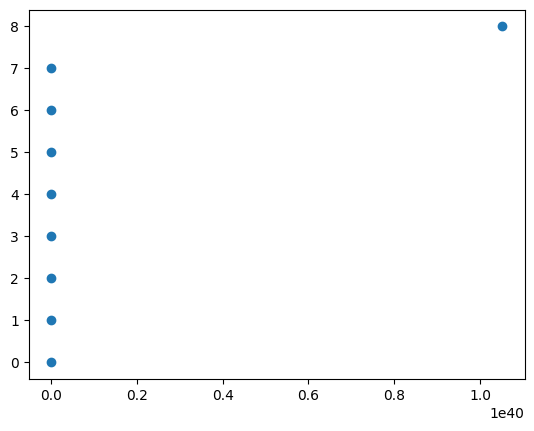

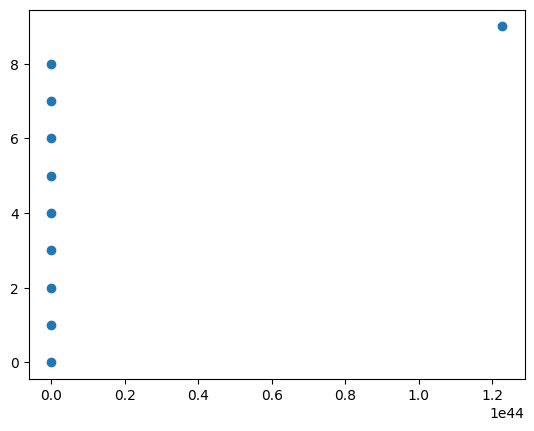

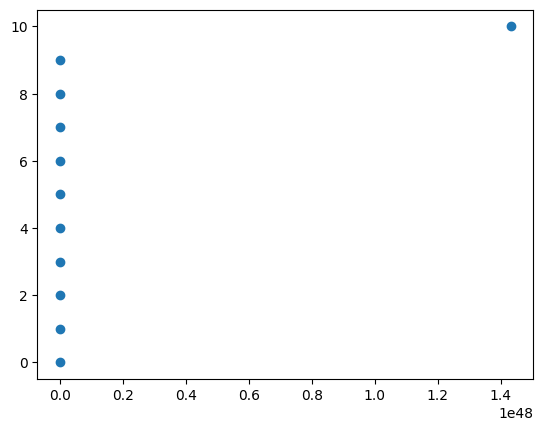

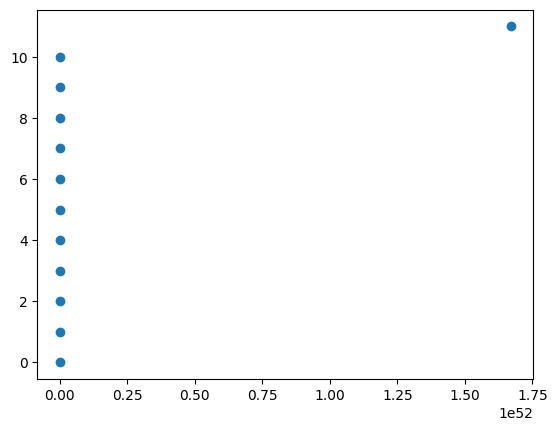

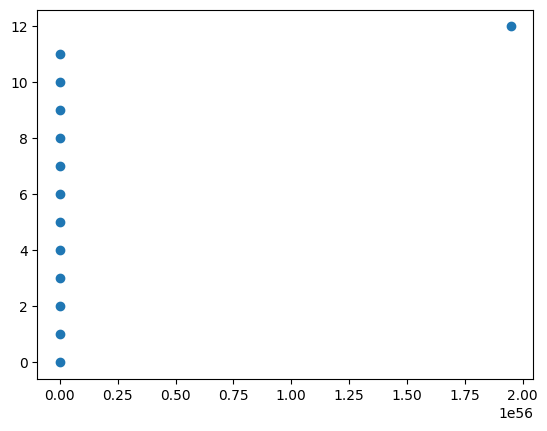

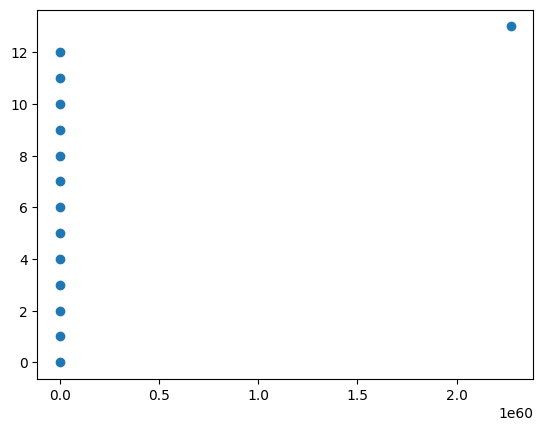

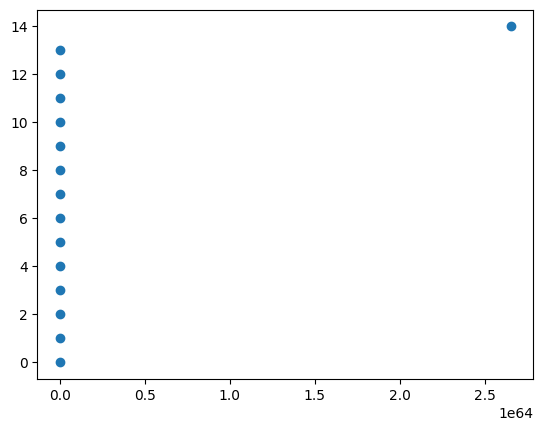

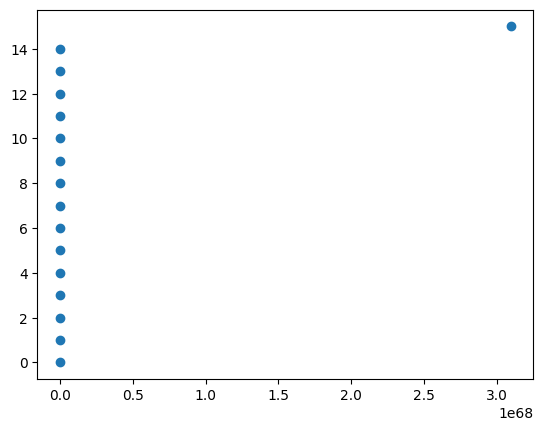

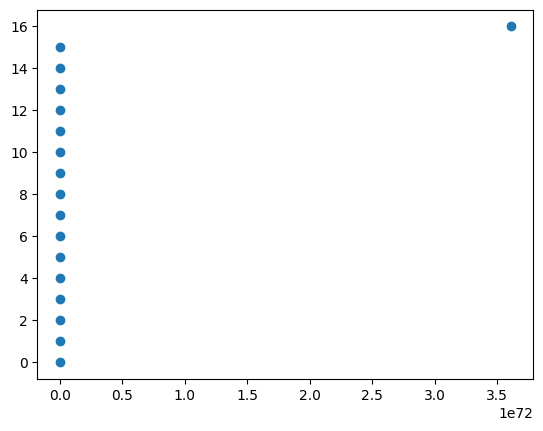

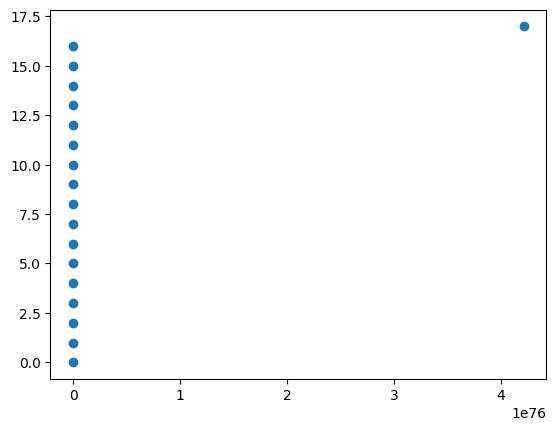

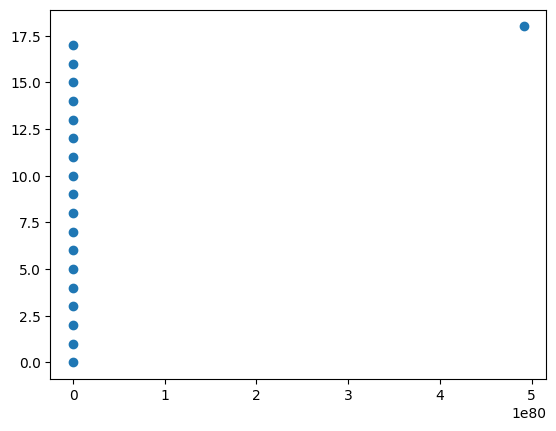

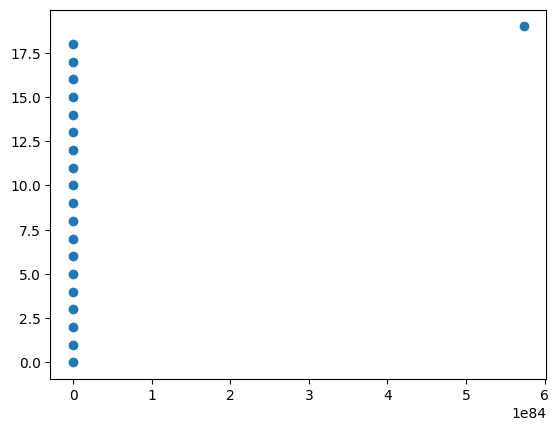

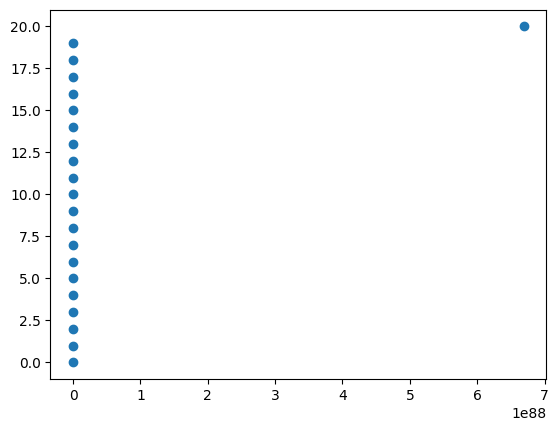

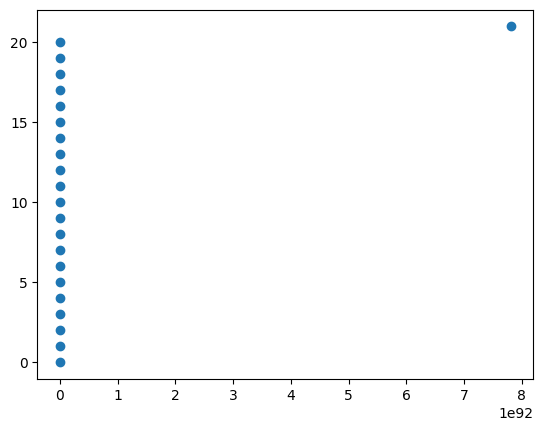

KeyboardInterrupt: 

In [98]:
costuri_plotate = []

for c in cost:
    costuri_plotate.append(c)
    plt.scatter(costuri_plotate, range(len(costuri_plotate)))
    plt.show();
    time.sleep(2)